In [1]:
pip install pyforest


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pyforest

In [3]:
data=pd.read_csv("Titanic-Dataset.csv",delimiter=',')
data

<IPython.core.display.Javascript object>

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
data.shape

(891, 12)

In [5]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
data['Age'].median()

28.0

In [10]:
data['Age']=data['Age'].fillna(value=28)    #using null values fillna
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [11]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [13]:
data['Embarked']=data['Embarked'].fillna(value="s")

In [14]:
data['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [15]:
data['Cabin']=data['Cabin'].fillna(value="C21,B97,C147,E35,F34,F35,G7,G8")

In [16]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: xlabel='Survived', ylabel='count'>

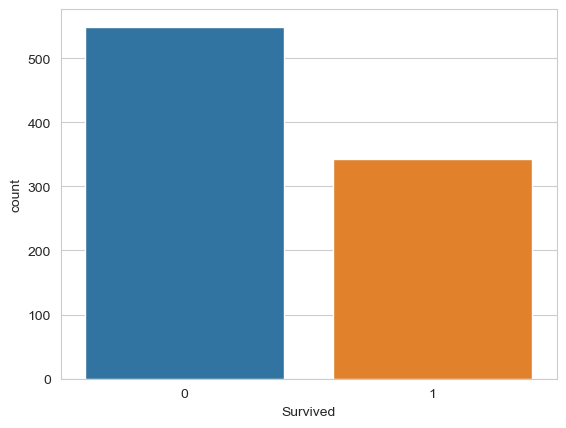

In [17]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=data)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: xlabel='Survived', ylabel='count'>

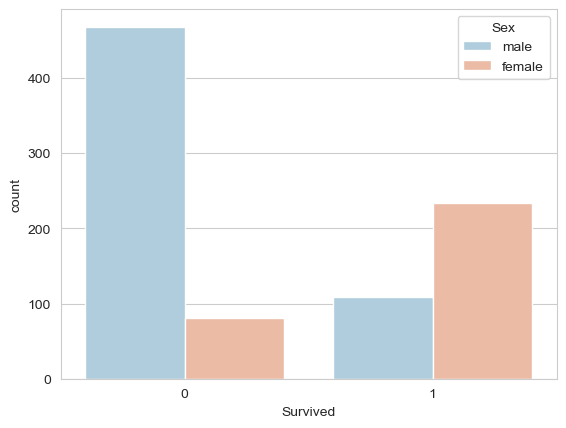

In [18]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=data,palette='RdBu_r')

In [19]:
data['Survived'] = data['Survived'].astype('category')
data['Pclass'] = data['Pclass'].astype('category')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

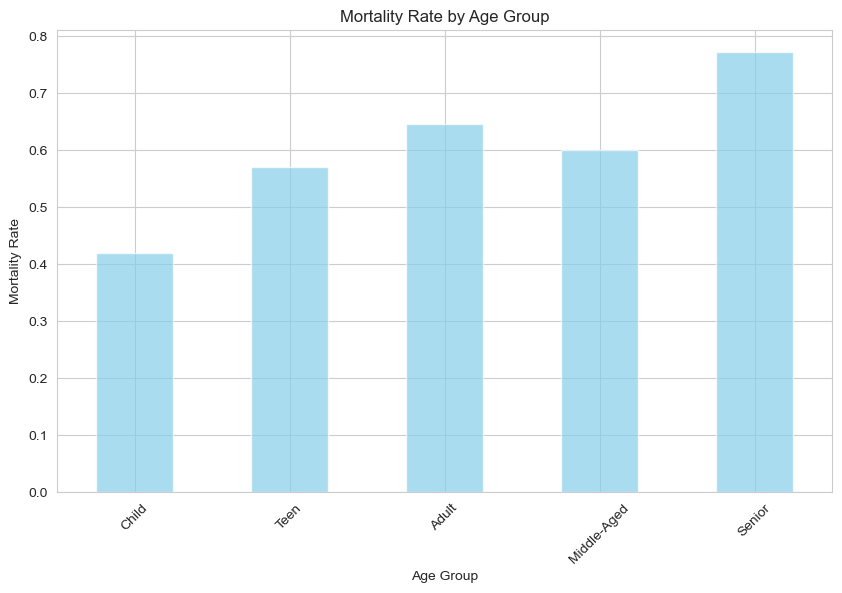

In [20]:
age_bins = [0, 12, 18, 35, 60, 80]
age_labels = ['Child', 'Teen', 'Adult', 'Middle-Aged', 'Senior']
data['AgeGroup'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels)

# Calculate the mortality rate for each age group
age_group_survival = data.groupby('AgeGroup')['Survived'].value_counts(normalize=True).unstack().fillna(0)

# Plot the mortality rate for each age group
plt.figure(figsize=(10, 6))
age_group_survival[0].plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('Mortality Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Mortality Rate')
plt.xticks(rotation=45)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

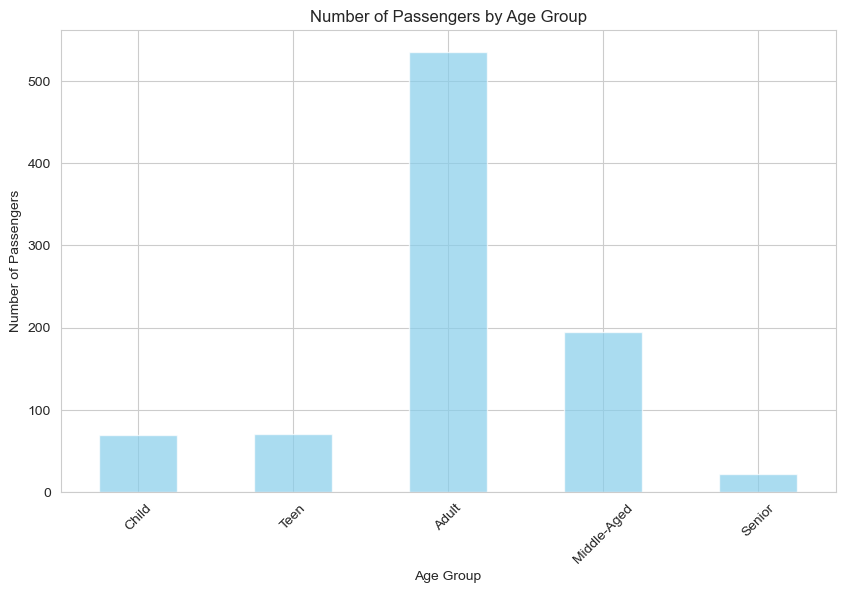

In [21]:
age_group_counts = data['AgeGroup'].value_counts().sort_index()

# Plot the number of passengers for each age group
plt.figure(figsize=(10, 6))
age_group_counts.plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('Number of Passengers by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=45)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

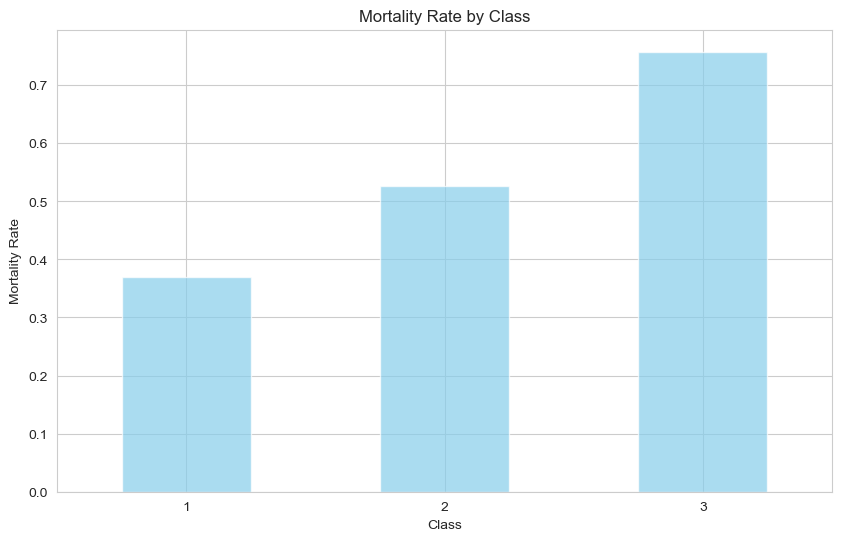

In [22]:
pclass_survival = data.groupby('Pclass')['Survived'].value_counts(normalize=True).unstack().fillna(0)

# Plot the mortality rate for each Pclass
plt.figure(figsize=(10, 6))
pclass_survival[0].plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('Mortality Rate by Class')
plt.xlabel('Class')
plt.ylabel('Mortality Rate')
plt.xticks(rotation=0)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

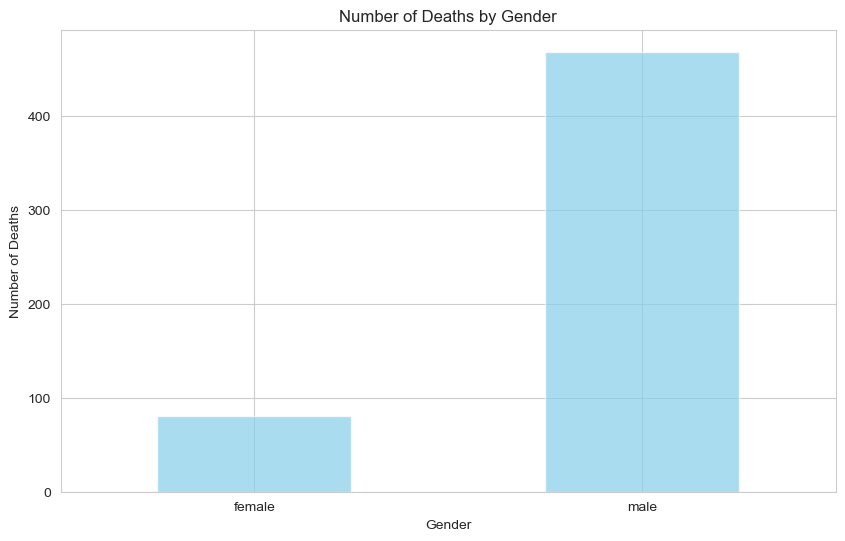

In [23]:
gender_survival = data.groupby('Sex')['Survived'].value_counts().unstack().fillna(0)

# Plot the number of males and females who died
plt.figure(figsize=(10, 6))
gender_survival[0].plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('Number of Deaths by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Deaths')
plt.xticks(rotation=0)
plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

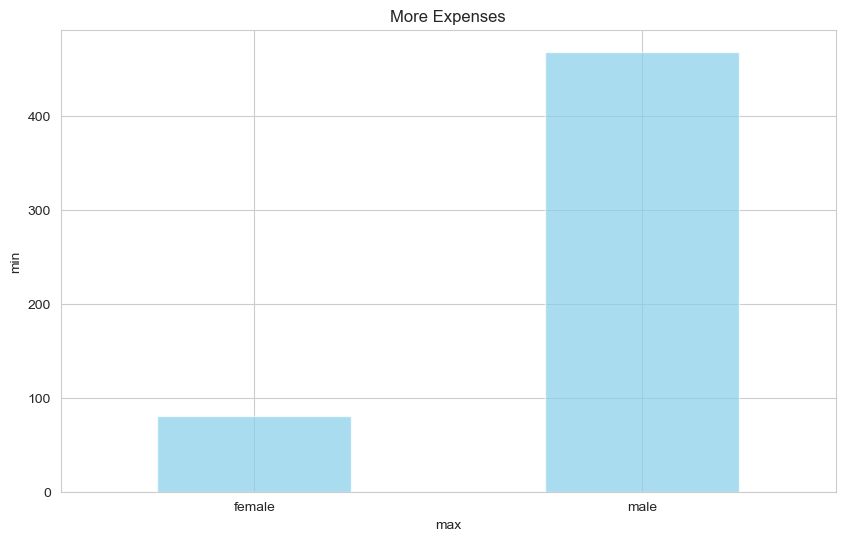

In [24]:
most_expensive_ticket = data.loc[data['Fare'].idxmax()]
least_expensive_ticket = data.loc[data['Fare'].idxmin()]
plt.figure(figsize=(10, 6))
gender_survival[0].plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('More Expenses')
plt.xlabel('max')
plt.ylabel('min')
plt.xticks(rotation=0)
plt.show()

# # Extract the fare values for the most and least expensive tickets
# most_expensive_fare = most_expensive_ticket['Fare']
# least_expensive_fare = least_expensive_ticket['Fare']

# # Create a DataFrame for plotting
# fare_comparison = pd.DataFrame({
#     'Ticket Type': ['Most Expensive', 'Least Expensive'],
#     'Fare': [most_expensive_fare, least_expensive_fare]
# })

# # Plot the fare comparison
# plt.figure(figsize=(10, 6))
# fare_comparison.plot(kind='bar', x='Ticket Type', y='Fare', color='skyblue', alpha=0.7)
# plt.title('Fare Comparison of Most and Least Expensive Tickets')
# plt.xlabel('Ticket Type')
# plt.ylabel('Fare')
# plt.xticks(rotation=0)
# plt.show()


<IPython.core.display.Javascript object>

<Axes: xlabel='SibSp', ylabel='count'>

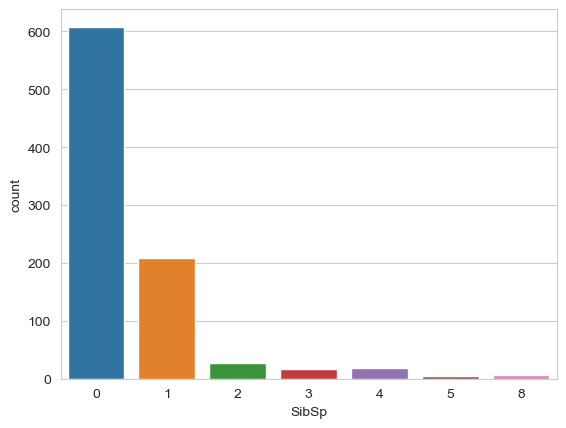

In [25]:
sns.countplot(x='SibSp',data=data)

<IPython.core.display.Javascript object>

<Axes: xlabel='Pclass', ylabel='Fare'>

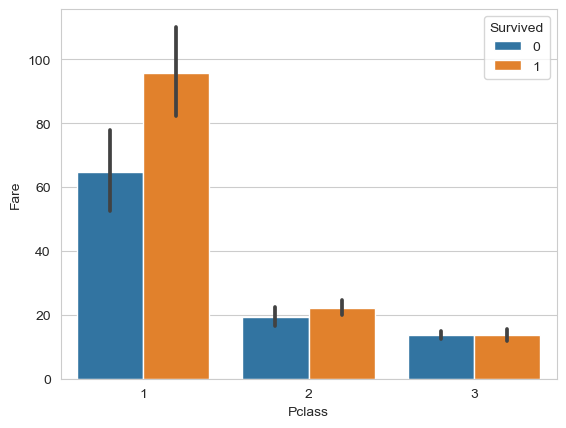

In [26]:
sns.barplot(data=data, x='Pclass', y='Fare', hue='Survived')

In [27]:
data


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,"C21,B97,C147,E35,F34,F35,G7,G8",S,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Middle-Aged
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,"C21,B97,C147,E35,F34,F35,G7,G8",S,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,"C21,B97,C147,E35,F34,F35,G7,G8",S,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,"C21,B97,C147,E35,F34,F35,G7,G8",S,Adult
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Adult
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,"C21,B97,C147,E35,F34,F35,G7,G8",S,Adult
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Adult


In [28]:
data=data.drop(['Embarked','Cabin','Name','AgeGroup','Ticket'],axis=1)
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000
887,888,1,1,female,19.0,0,0,30.0000
888,889,0,3,female,28.0,1,2,23.4500
889,890,1,1,male,26.0,0,0,30.0000


In [29]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['Sex']= label_encoder.fit_transform(data['Sex'])
data['Sex'].value_counts()

1    577
0    314
Name: Sex, dtype: int64

In [30]:
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.0,1,0,7.2500
1,2,1,1,0,38.0,1,0,71.2833
2,3,1,3,0,26.0,0,0,7.9250
3,4,1,1,0,35.0,1,0,53.1000
4,5,0,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000
887,888,1,1,0,19.0,0,0,30.0000
888,889,0,3,0,28.0,1,2,23.4500
889,890,1,1,1,26.0,0,0,30.0000


In [31]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.0,1,0,7.2500
1,2,1,1,0,38.0,1,0,71.2833
2,3,1,3,0,26.0,0,0,7.9250
3,4,1,1,0,35.0,1,0,53.1000
4,5,0,3,1,35.0,0,0,8.0500


In [32]:
x=data.drop('Survived',axis=1).values
y=data['Survived'].values

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)

In [35]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

# Scale the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Initialize and train the logistic regression model
lr = LogisticRegression(solver='lbfgs', max_iter=10000)
lr.fit(x_train, y_train)

# Make predictions
y_pred = lr.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)


0.7910447761194029


In [36]:
from sklearn.model_selection import GridSearchCV
import numpy as np

# Define the parameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

# Initialize the logistic regression model
lr = LogisticRegression(solver='lbfgs', max_iter=10000)

# Perform GridSearchCV
logreg_cv = GridSearchCV(lr, param_grid, cv=5)
logreg_cv.fit(x_train, y_train)

# Print the best parameters and best score
print("Tuned Logistic Regression parameters: {}".format(logreg_cv.best_params_))
print("Best score is {}".format(logreg_cv.best_score_))


Tuned Logistic Regression parameters: {'C': 0.05179474679231213}
Best score is 0.7978322580645162
